In [5]:
import torch  
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import os 
import cv2
from pathlib import Path
import torchvision
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [6]:
image_dir = Path("saved_frames")

In [20]:
image_paths = list(image_dir.glob("*.jpg")) + list(image_dir.glob("*.png"))

In [21]:
def load_and_preprocess_image(img_paths, target_size=(244,244)):
    img = cv2.imread(str(img_paths))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = cv2.resize(img, target_size)
    
    img = img / 255.0
    
    return img 



In [22]:
images = [load_and_preprocess_image(img_path) for img_path in image_paths]
images = np.array(images)

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(images)
dataset = dataset.batch(32)  # Batch size of 32 for processing

In [24]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']].dropna()  # Drop rows with missing values

# Display the first few rows
print(df.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0


In [25]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [26]:
# Define numerical and categorical features
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']

# Define transformers
num_transformer = StandardScaler()  # Standardization for numerical features
cat_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encoding for categorical features

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [27]:
cat_features

['Pclass', 'Sex', 'Embarked']

In [28]:
num_features

['Age', 'SibSp', 'Parch', 'Fare']

In [29]:
# Define target and features
X = df[features]
y = df['Survived']

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (569, 7)
Testing set shape: (143, 7)


In [30]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data transformation
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # ML model
])

# Train the model
pipeline.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [32]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [19]:
import numpy as np 

In [28]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000) -> None:
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step
        self.weights = None
        self.bias = None
    
    def fit(self,X , y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                updata = self.lr * (y[idx] - y_predicted)
                self.weights += updata * x_i
                self.bias += updata

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)
    
    def _unit_step(self, x):
        return np.where(x >= 0, 1, 0)

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [38]:
np.random.seed(0)
X = np.linspace(0, 6, 30).reshape(-1,1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

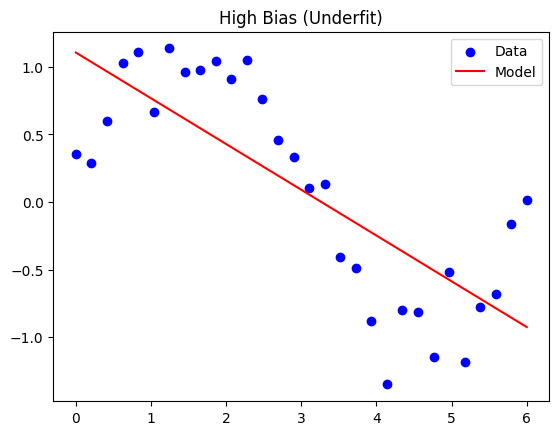

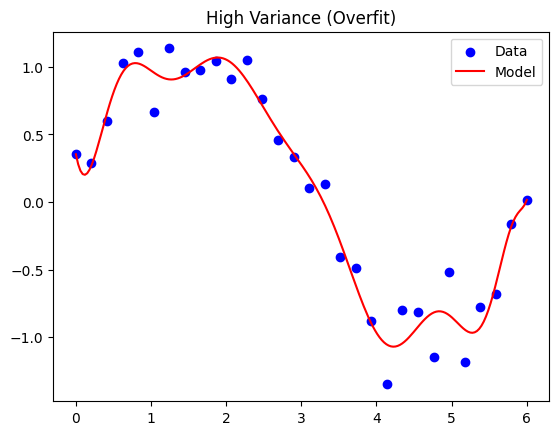

In [41]:
for degree, title in [(1, "High Bias (Underfit)"), (15, "High Variance (Overfit)")]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    X_test = np.linspace(0, 6, 200).reshape(-1,1)
    y_pred = model.predict(poly.transform(X_test))

    plt.figure()
    plt.scatter(X, y, color="blue", label="Data")
    plt.plot(X_test, y_pred, color="red", label="Model")
    plt.title(title)
    plt.legend()
    plt.show()

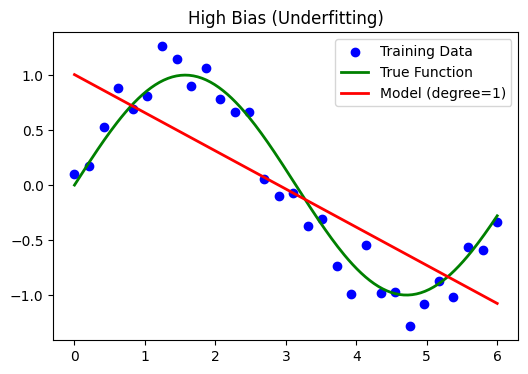

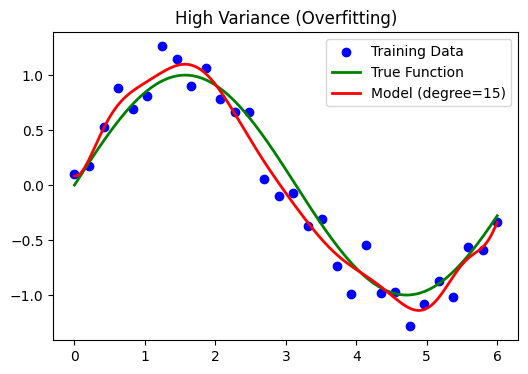

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data: y = sin(x) + noise
np.random.seed(42)
X = np.linspace(0, 6, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Test data (smooth curve)
X_test = np.linspace(0, 6, 200).reshape(-1, 1)
y_true = np.sin(X_test).ravel()

def plot_model(degree, title):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    y_pred = model.predict(poly.transform(X_test))

    plt.figure(figsize=(6,4))
    plt.scatter(X, y, color="blue", label="Training Data")
    plt.plot(X_test, y_true, color="green", linewidth=2, label="True Function")
    plt.plot(X_test, y_pred, color="red", linewidth=2, label=f"Model (degree={degree})")
    plt.title(title)
    plt.legend()
    plt.show()

# High Bias (underfit, degree=1)
plot_model(1, "High Bias (Underfitting)")

# High Variance (overfit, degree=15)
plot_model(15, "High Variance (Overfitting)")


In [46]:
import numpy as np 

In [47]:
n_states = 16  
n_actions = 4  
goal_state = 15  

In [48]:
Q_table = np.zeros((n_states,n_actions))

In [50]:
Q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000

In [52]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  
    while current_state != goal_state:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  
        else:
            action = np.argmax(Q_table[current_state])  

        next_state = (current_state + 1) % n_states

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state

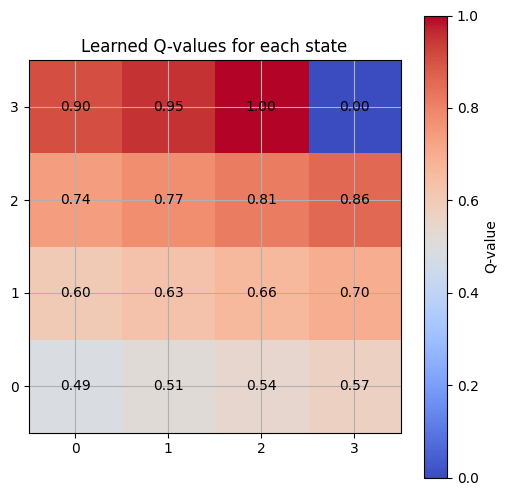

Learned Q-table:
[[0.48767498 0.4868947  0.46816798 0.39013998]
 [0.51334208 0.51334203 0.51333551 0.51330923]
 [0.54036009 0.54036009 0.54035306 0.54035317]
 [0.56880009 0.56879864 0.56880009 0.56880009]
 [0.59873694 0.59873694 0.59873694 0.59873694]
 [0.63024941 0.63024941 0.63024941 0.63024941]
 [0.66342043 0.66342043 0.66342043 0.66342043]
 [0.6983373  0.6983373  0.6983373  0.6983373 ]
 [0.73509189 0.73509189 0.73509189 0.73509189]
 [0.77378094 0.77378094 0.77378094 0.77378094]
 [0.81450625 0.81450625 0.81450625 0.81450625]
 [0.857375   0.857375   0.857375   0.857375  ]
 [0.9025     0.9025     0.9025     0.9025    ]
 [0.95       0.95       0.95       0.95      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [53]:
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4)) 

# Plot the grid of Q-values
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotating the Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Print learned Q-table
print("Learned Q-table:")
print(Q_table)

In [55]:
import gym
import numpy as np

# Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)  # deterministic for simplicity

# Initialize Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.8      # learning rate
gamma = 0.95     # discount factor
epsilon = 0.1    # exploration rate
episodes = 2000

# Training
for episode in range(episodes):
    state = env.reset()[0]  # reset returns tuple (state, info)
    done = False

    while not done:
        # ε-greedy action selection
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()  # explore
        else:
            action = np.argmax(Q[state,:])      # exploit

        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state, :]) - Q[state, action]
        )

        state = next_state

# Test learned policy
state = env.reset()[0]
env.render()
done = False
while not done:
    action = np.argmax(Q[state,:])
    state, reward, done, truncated, info = env.step(action)
    env.render()


AttributeError: module 'numpy' has no attribute 'bool8'